In [44]:
import os
%matplotlib inline
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein
from Bio import SeqIO
from Bio import Alphabet
from Bio.Blast import NCBIXML
from Bio import Entrez
Entrez.email = 'giacomo.villa.mi@gmail.com'
from Bio.Align.Applications import ClustalwCommandline
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
from Bio import Phylo

In [2]:
multiSeqs = open("./data/anisakis_result.xml")

In [3]:
blast_records = NCBIXML.read(multiSeqs)

In [4]:
sequences = []

In [19]:
queryName = blast_records.query
aligns = blast_records.alignments
for hit in aligns:
    accessionId = hit.accession
    description = hit.hit_def
    entrez_result = Entrez.efetch(db="protein", id=accessionId, rettype="gp", retmode="xml")
    record = Entrez.read(entrez_result)
    sequence = Seq(record[0]['GBSeq_sequence'].upper(), Alphabet.ProteinAlphabet())
    rec = SeqRecord(sequence, id=str(accessionId), description=str(description))
    sequences.append(rec)

In [21]:
SeqIO.write(sequences, './data/multiSeqAnisakis.fasta', "fasta")

50

In [40]:
muscle_exe = "./muscle/muscle3.8.31_i86darwin64"

in_file = './data/multiSeqAnisakis.fasta'
out_file = './data/muscleOutAnisakis.afa'

muscle_cline = MuscleCommandline(muscle_exe, input=in_file, out=out_file)

stdout, stderr = muscle_cline()
print(stdout, stderr)

 
MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

multiSeqAnisakis 50 seqs, max length 528, avg  length 524
00:00:00      1 MB(0%)  Iter   1    0.08%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1   39.29%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1   78.51%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1    0.08%  K-mer dist pass 2
00:00:00      1 MB(0%)  Iter   1   39.29%  K-mer dist pass 2
00:00:00      1 MB(0%)  Iter   1   78.51%  K-mer dist pass 2
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      2 MB(0%)  Iter   1    2.04%  Align node       
00:00:00      3 MB(0%)  Iter   1    4.08%  Align node
00:00:00      4 MB(0%)  Iter   1    6.12%  Align node
00:00:00      4 MB(0%)  Iter   1    8.16%  Align node
00:00:00      4 MB(0%)  Iter   1   10.20%  Align node
00:0

In [43]:
align = AlignIO.read('./data/muscleOutAnisakis.afa', "fasta")
print('Output as FASTA\n', align, '\n')

Output as FASTA
 SingleLetterAlphabet() alignment with 50 rows and 528 columns
---MKSFTKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_009113342
---MKSFTKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_009355296
---MKSFTKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_537096
---MKSVVKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_009312534
---MKSAVKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_009312558
---MKSVVKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_009312522
------MGKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTSL...FKF YP_009058864
---MSVLGKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTSL...FKF YP_009445828
---MVGFYKYQGGLSTWLESSNHKDIGTLYFLFGLWSGMVGTGL...FKF YP_004778171
---MVGFYKYQGGLSTWLESSNHKDIGTLYFLFGLWSGMVGTGL...FKF YP_004778134
---MSKFYKYQGGLSIWLESSNHKDIGTLYFLFGLWSGMVGTSL...FKF YP_004935200
---MSGFYSYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTSL...FKF YP_004935169
---MSGFYKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTSL...FKF NP_006949
---MKRFYKYQGGLSVWLESSNHKDIGTLYFLFGLWSGMVGTAL...LKF YP_009027241
---MKSIFKYQGGLSVWLESPNHKDIGTLYF

In [53]:
out_file = './data/muscleAlignment_DRR076693.3.aln'
tree_file = './data/try.phy'

In [48]:
muscle_cline = MuscleCommandline(muscle_exe, input=in_file, out=out_file, clw = True)

In [49]:
stdout, stderr = muscle_cline()

In [54]:
command = '"' + muscle_exe + '" -maketree -in "' + out_file +  '" -out "' + tree_file + '"'
print(command)

"./muscle/muscle3.8.31_i86darwin64" -maketree -in "./data/muscleAlignment_DRR076693.3.aln" -out "./data/try.phy"


In [56]:
tree = Phylo.read('./data/multipleSequences_muscle_DRR076693.3.phy', "newick")

In [57]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.146763, comment='Ascoidea rubescens DSM 1968', name='synthetase')
        Clade(branch_length=0.0314536)
            Clade(branch_length=0.11531, comment='Pichia membranifaciens NRRL Y-2026', name='PICMEDRAFT_29905')
            Clade(branch_length=0.0183154)
                Clade(branch_length=0.0969941, comment='Tetrapisispora blattae CBS 6284', name='TBLA_0B02320')
                Clade(branch_length=0.00517567)
                    Clade(branch_length=0.0918184, comment='Eremothecium sinecaudum', name='HBL382Wp')
                    Clade(branch_length=0.000144266)
                        Clade(branch_length=0.0652666)
                            Clade(branch_length=0.0264075, comment='Saccharomyces cerevisiae S288C', name='WRS1')
                            Clade(branch_length=0.0264075, comment='Saccharomyces eubayanus', name='protein')
                        Clade(branch_length=0.00046967)
                 

In [58]:
Phylo.draw_ascii(tree)

  _________________________________________________________ synthetase
 |
_|            _____________________________________________ PICMEDRAFT_29905
 |           |
 |___________|        _____________________________________ TBLA_0B02320
             |       |
             |_______|  ___________________________________ HBL382Wp
                     | |
                     |_|                          _________ WRS1
                       |_________________________|
                       |                         |_________ protein
                       |
                       |___________________________________ TPHA_0P01010
                       |
                       |              _____________________ KLTH0C09768p
                       | ____________|
                       ||            |_____________________ LALA0_S08e02520g
                       ||
                        |__________________________________ KLLA0_B07733g
                        |
                      

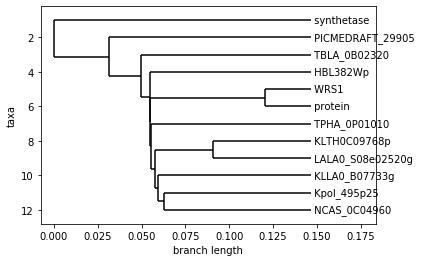

In [59]:
tree.rooted = True

Phylo.draw(tree)